# View final results  
**Use Case:** AM parts from Xuan Zhang    

Author: Aniket Tekawade, Argonne National Laboratory, atekawade@anl.gov  

https://tomobank.readthedocs.io/en/latest/source/data/docs.data.spheres.html

**NOTE** This notebook contains jupyter widgets that may not display unless you re-rerun the notebook.  

In [1]:
%matplotlib notebook

import sys
import os
import numpy as np
import pandas as pd
import glob
import h5py
import time

import matplotlib.pyplot as plt
import matplotlib as mpl

# from ct_segnet.data_utils import data_io
from tomo_encoders import DataFile
from tomo_encoders import viewer

# import ipywidgets.interact class, this class will represent a slide bar.
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout
from IPython.display import display, update_display
from ipyfilechooser import FileChooser


def text_width(wd):
    return Layout(width = "%ipx"%wd)

In [2]:
ct_path = '/data02/MyArchive/tomo_datasets/AM_part_Xuan/seg_data/xzhang_feb22_rec/wheel1_sam1/stitched/'
seg_path = '/data02/MyArchive/tomo_datasets/AM_part_Xuan/seg_data/xzhang_feb22_rec/wheel1_sam1/segmented/'

**IMPORTANT** Notebook widgets may not display correctly unless you re-run the notebook at your end.  

In [3]:
Vx = DataFile(ct_path, tiff = True).read_full()
Vy = DataFile(seg_path, tiff = True).read_full()


##################################################
Found existing tiff folder: 
Dataset shape: (2464, 864, 1344)

##################################################
Found existing tiff folder: 
Dataset shape: (2464, 864, 1344)


<IPython.core.display.Javascript object>


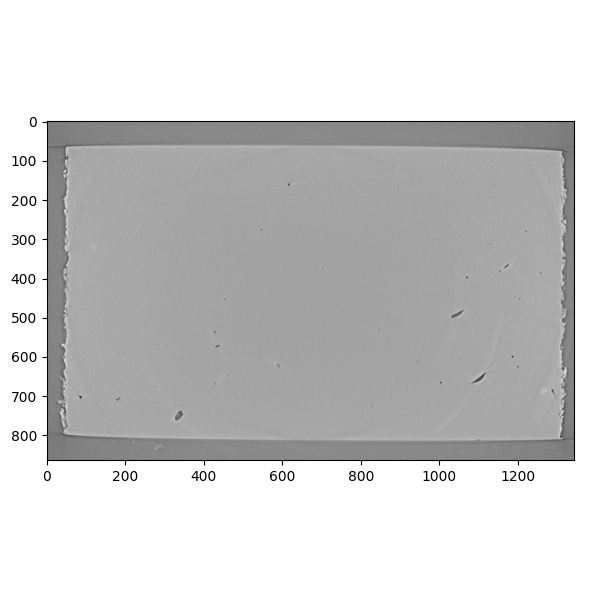

In [4]:
# slice reader
text_axis = widgets.IntText(description = "axis", min = 0, max = 2, value = 0, layout = text_width(150))
slider = widgets.IntSlider(description = "slider", min = 0, value = 0, step = 1)
display(HBox(children = [text_axis, slider]))

btn_seg = widgets.Button(description = "Segment")
load_btn_1 = widgets.Button(description = "Load Image")
checkbox_edge = widgets.Checkbox(description = "Edge Plot", value = True)
display(HBox(children = [load_btn_1, btn_seg, checkbox_edge]))

fig, ax = plt.subplots(1,1, figsize = (6,6))
fig.tight_layout()

def load_image(obj):
    
    img = Vx.take(slider.value, axis = text_axis.value)
    ax.clear()
    ax.imshow(img, cmap = 'gray')
    return

def seg_shower(obj):
    
    seg_img = Vy.take(slider.value, axis = text_axis.value)
    img = Vx.take(slider.value, axis = text_axis.value)
    if checkbox_edge.value:
        viewer.edge_plot(img, seg_img, ax)
    else:
        viewer.seg_plot(img, seg_img, ax)
#     fig.tight_layout()
    return

btn_seg.on_click(seg_shower)
load_btn_1.on_click(load_image)

def update_slider(obj):
    slider.max = Vx.shape[text_axis.value]
    
    if text_axis.value == 0:
        i, j = 1,2
    elif text_axis.value == 1:
        i, j = 0,2
    elif text_axis.value == 2:
        i, j = 0,1
    
    return
text_axis.observe(update_slider)

<IPython.core.display.Javascript object>


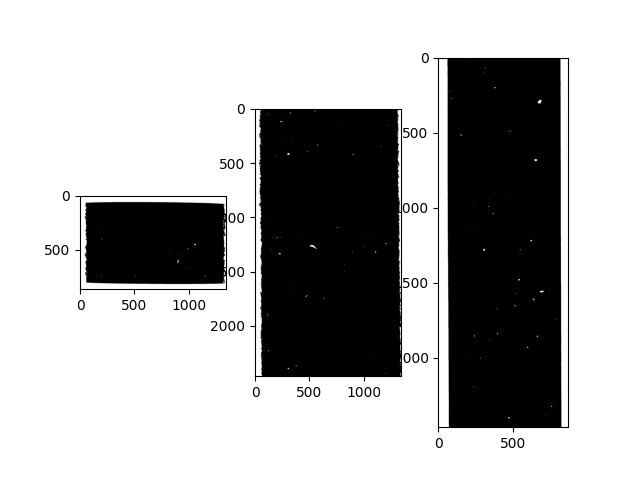

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [5]:
viewer.view_midplanes(vol = Vy)

In [6]:
Vy[0,0,0]

1

The end!